In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import calendar
import numpy as np
import pandas as pd
from joblib import load

from helper import *

In [3]:
showings = load('../data/showings_extra_feature.joblib')
showings.replace(np.inf, 0, inplace=True)

In [18]:
showings.loc[(showings.days_since_release > -2) & (showings.days_since_release <= 28)].sold.sum() / showings.sold.sum()

0.6529070838656444

# Analysis relative to the release date, first 10 days after premiere

In [4]:
showings.tmdb_release_date = pd.to_datetime(showings.tmdb_release_date, format='%Y-%m-%d')

In [5]:
week_of_release = showings.loc[showings.days_since_release < 10, ('dayofweek', 'hour', 'coverage')]

In [19]:
after_week_of_release = showings.loc[showings.days_since_release > 10, ('dayofweek', 'hour', 'coverage')]

## Coverage per hour per day

In [28]:
stats_prime = dict()
stats_early = dict()
stats_prime_orignal = dict()
for i in range(7):
    temp = week_of_release.loc[week_of_release.dayofweek == i, ('hour', 'coverage')]
    temp_orig = after_week_of_release.loc[after_week_of_release.dayofweek == i, ('hour', 'coverage')]
    stats_prime[calendar.day_name[i]] = dict()
    stats_early[calendar.day_name[i]] = dict()
    stats_prime_orignal[calendar.day_name[i]] = dict()
    for j in range(24):
        if j == 23 or j < 9: continue
        time = '0' + str(i) + ':00-0' + str(j) + ':59' if j<10 else str(j) + ':00-' + str(j) + ':59'
        if j < 16:
            stats_early[calendar.day_name[i]][time] = temp.loc[temp.hour == j, 'coverage']
        else:
            stats_prime[calendar.day_name[i]][time] = temp.loc[temp.hour == j, 'coverage']
            stats_prime_orignal[calendar.day_name[i]][time] = temp_orig.loc[temp_orig.hour == j, 'coverage']

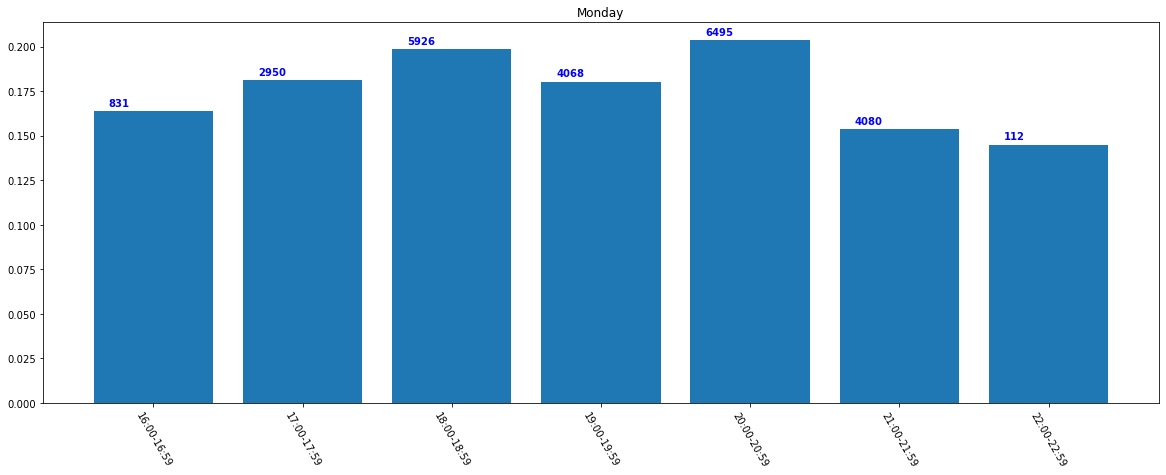

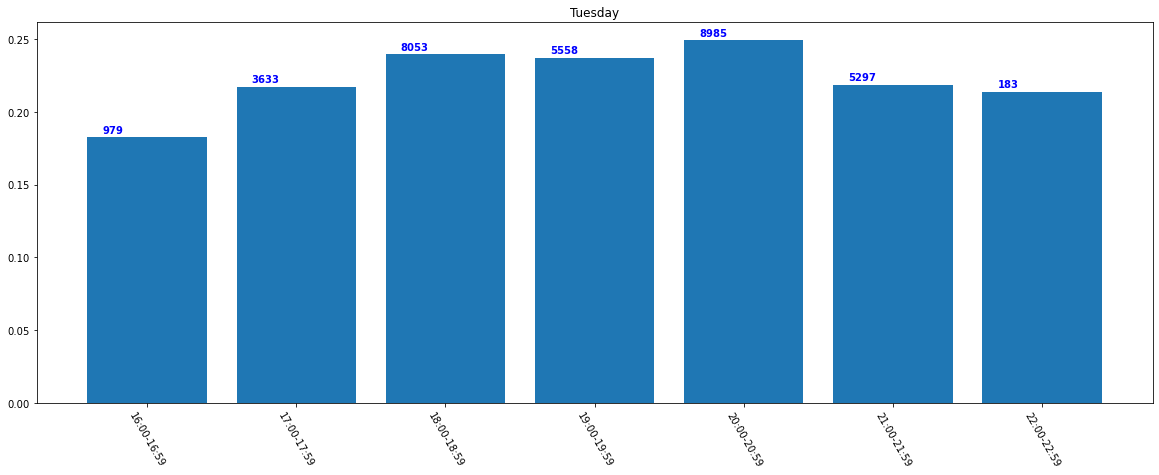

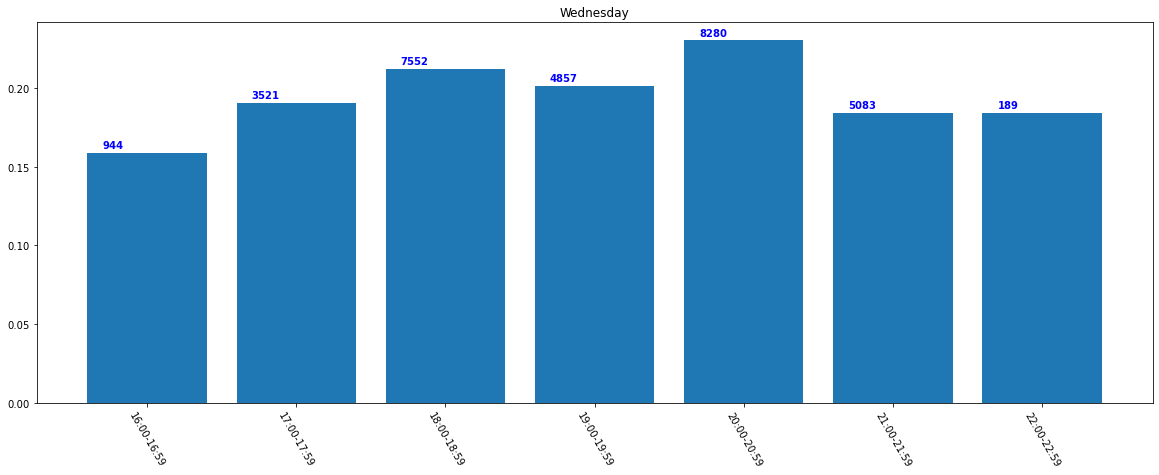

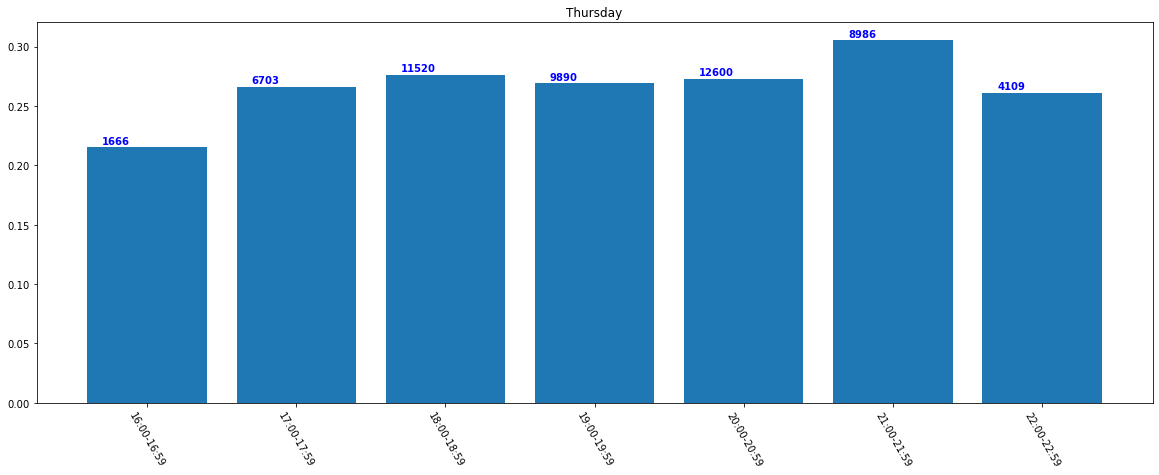

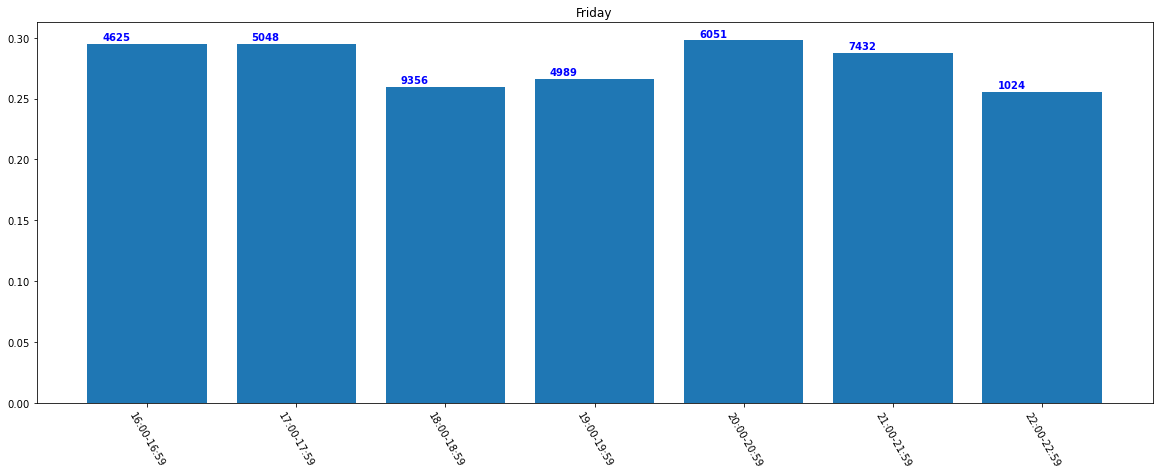

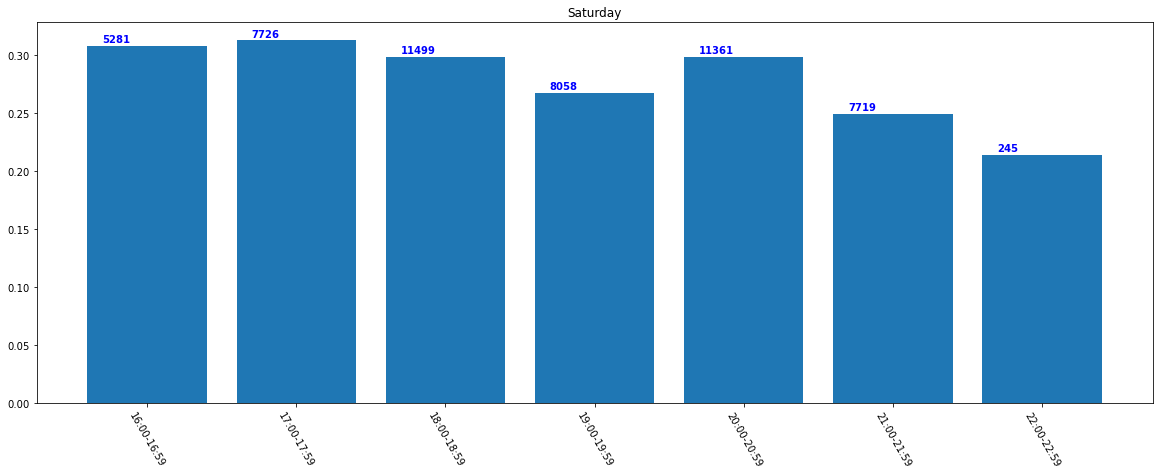

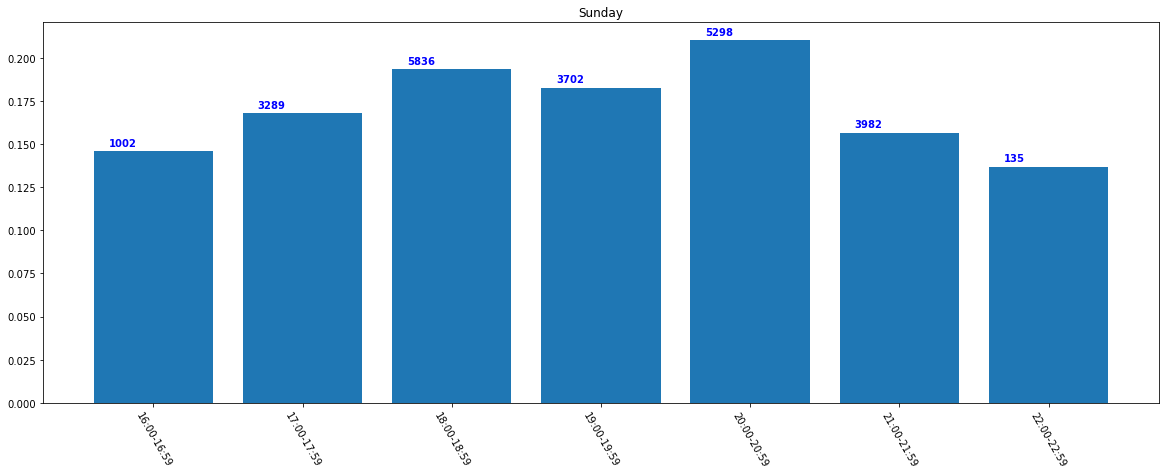

In [7]:
for day in stats_prime:
    bar_plot(stats_prime[day], title=day, )

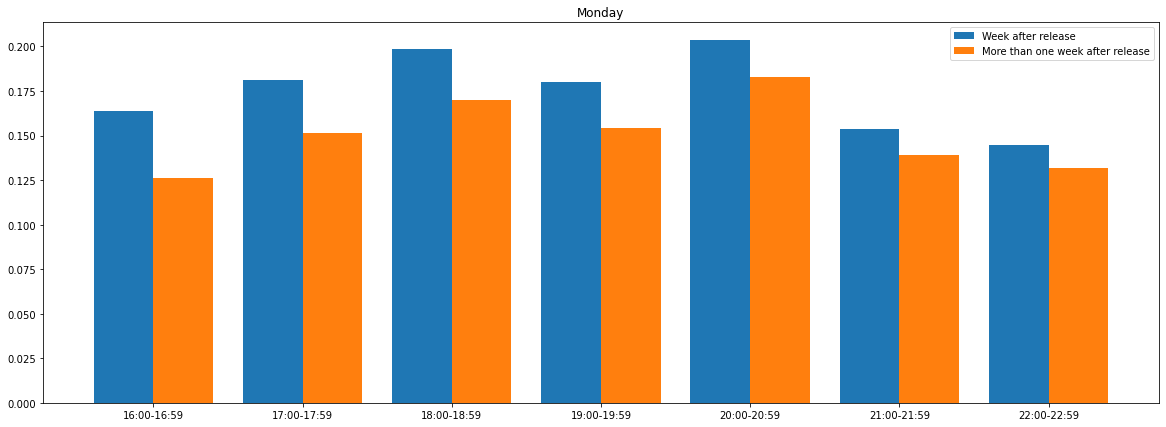

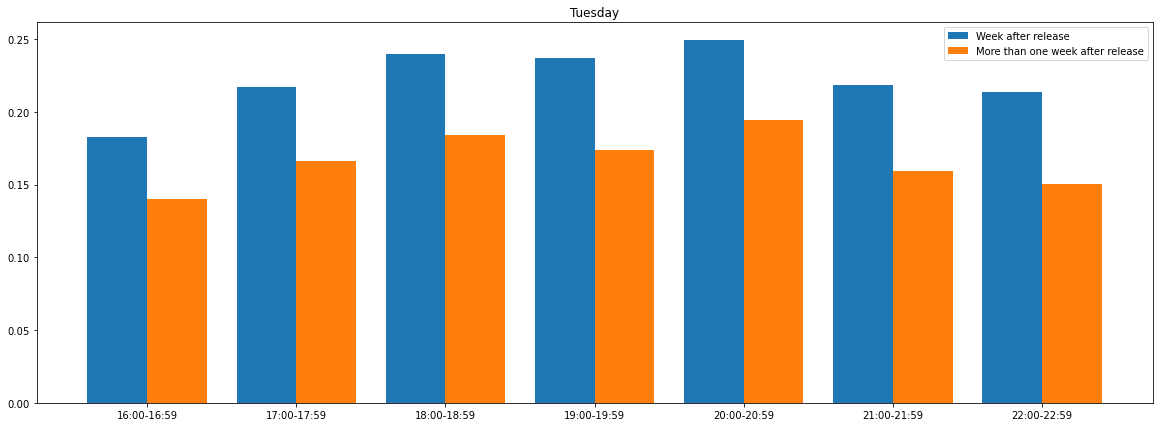

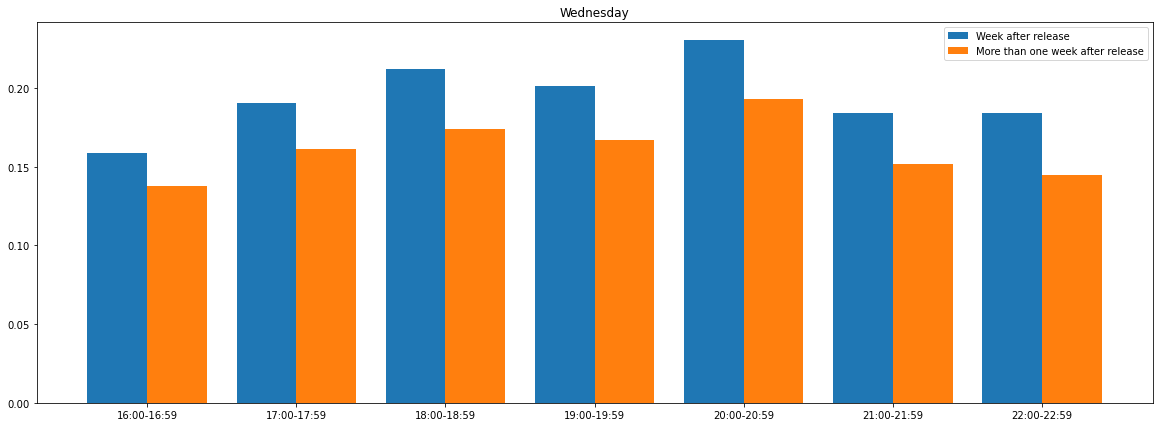

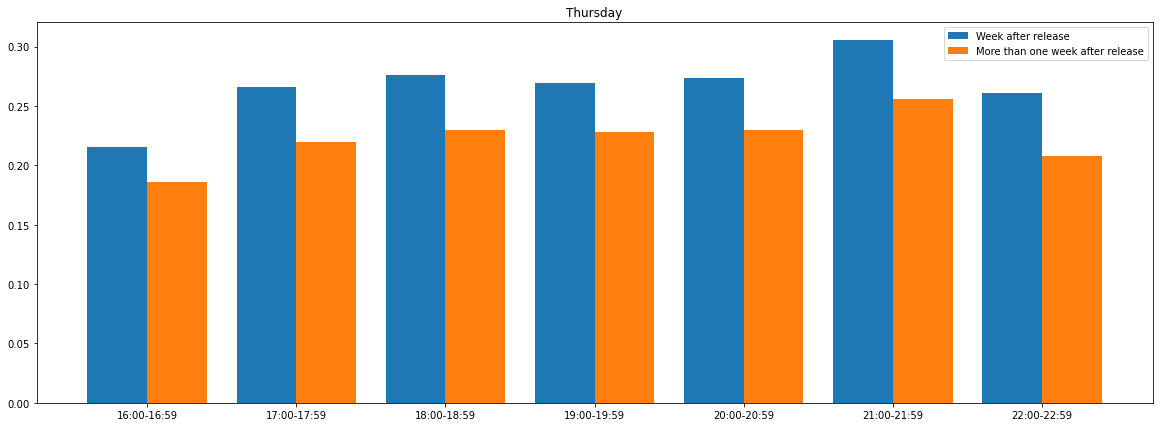

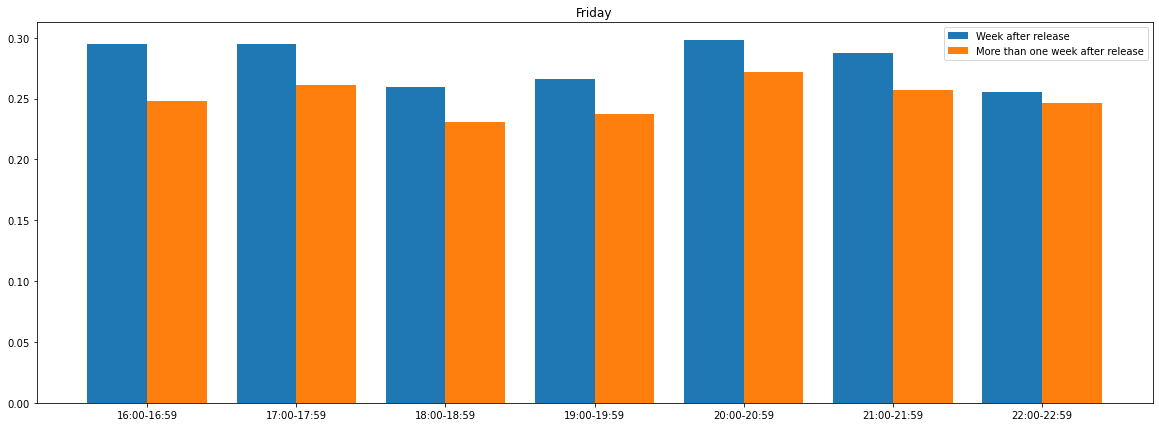

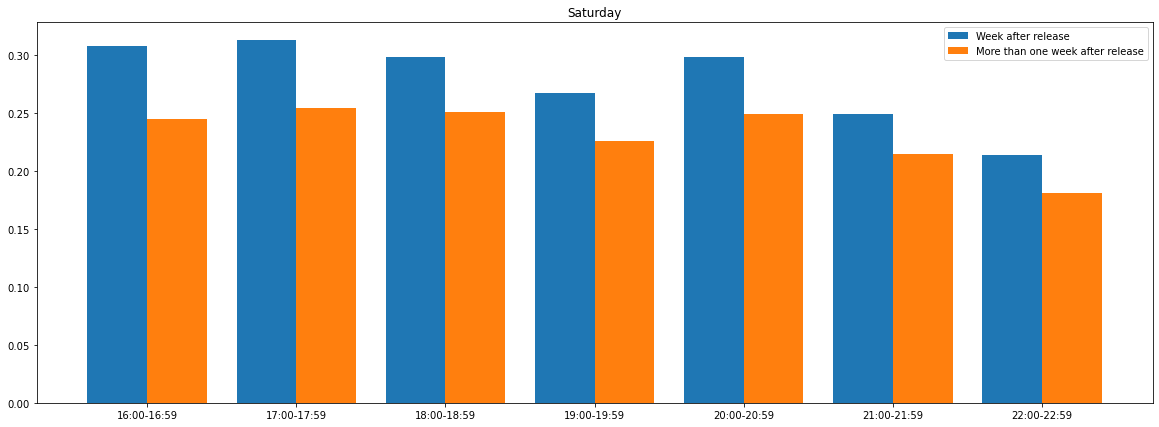

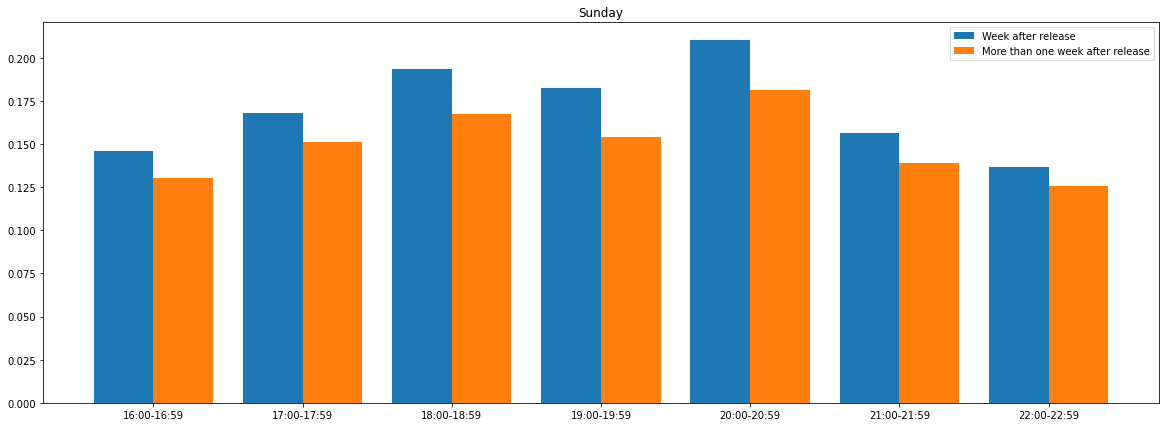

In [30]:
for day in stats_prime:
    two_bar_plot(stats_prime[day], stats_prime_orignal[day], title=day, legend=('Week after release', 'More than one week after release'), file_name='hour_day_release_'+day)

In [20]:
stats, stats_orig, stats_after = dict(), dict(), dict()
for i in range(13, 24):
    time = '0' + str(i) + ':00-0' + str(i) + ':59' if i<10 else str(i) + ':00-' + str(i) + ':59'
    stats[time] = week_of_release.loc[week_of_release.hour == i, 'coverage']
    stats_orig[time] = showings.loc[showings.hour == i, 'coverage']
    stats_after[time] = after_week_of_release.loc[after_week_of_release.hour == i, 'coverage']

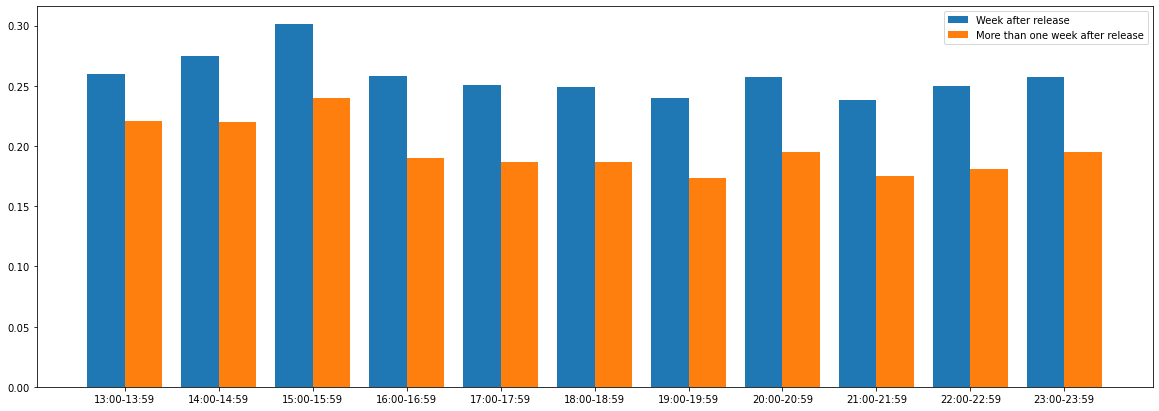

In [32]:
two_bar_plot(stats, stats_after, r=0, legend=('Week after release', 'More than one week after release'), file_name='hour_week_release')

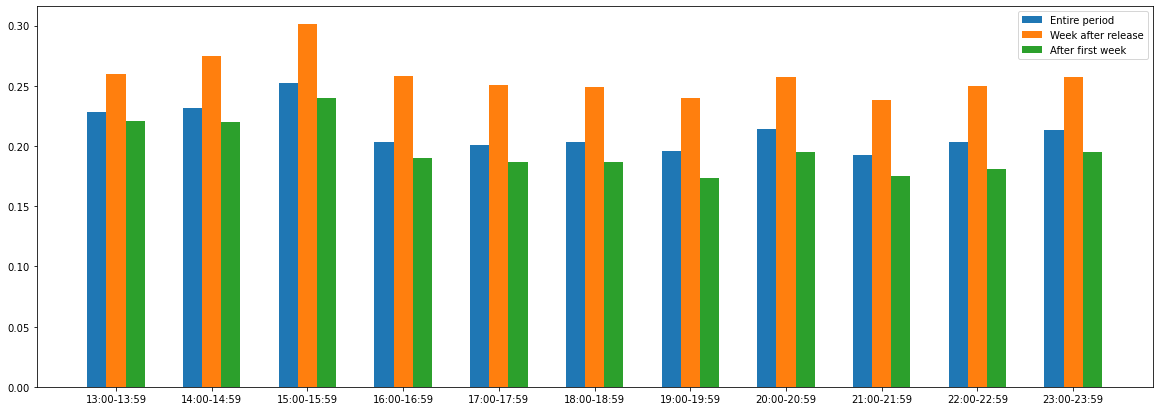

In [24]:
three_bar_plot(stats_orig, stats, stats_after, r=0, legend=('Entire period', 'Week after release', 'After first week'), file_name='hour_week_release_extra')

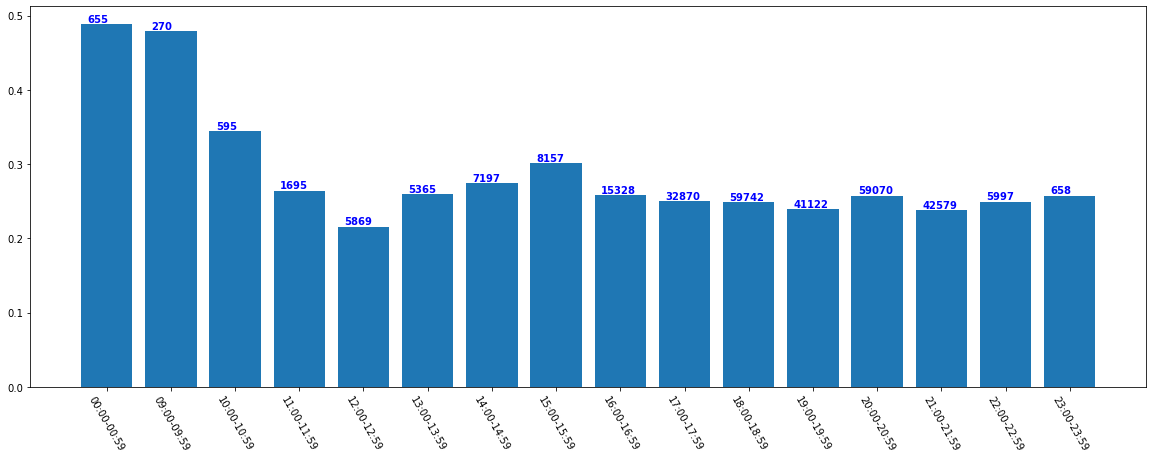

In [9]:
bar_plot(stats, h=7, file_name='7_hour')

In [47]:
days_since_release = np.sort(showings.days_since_release.unique())

In [56]:
stats = dict()
for i in days_since_release[:62]:
    stats[i] = showings.loc[showings.days_since_release == i, 'coverage']

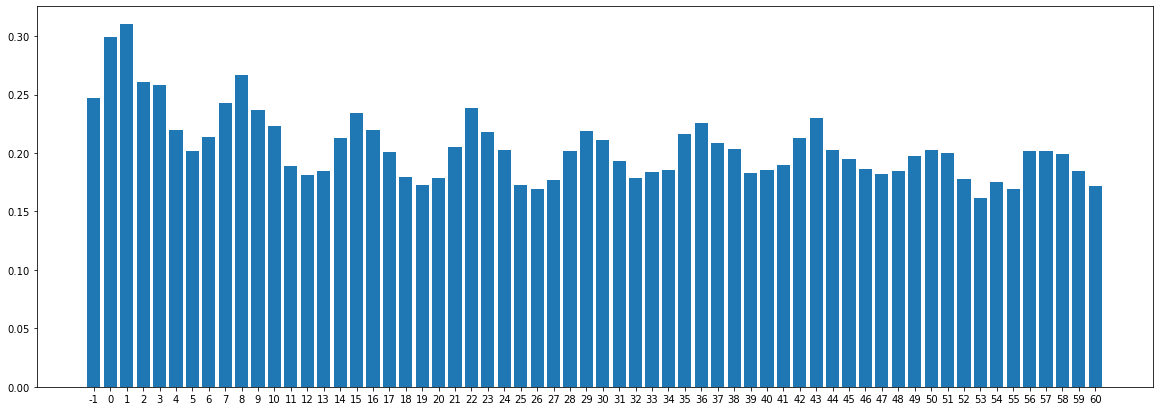

In [69]:
bar_plot(stats, r=0, count=False, file_name='since_release')

In [85]:
stats = dict()
temp = showings.loc[showings.tmdb_genre_ids.apply(lambda numbers: 37 in numbers)]
for i in days_since_release:
    stats[i] = temp.loc[temp.days_since_release == i, 'coverage']

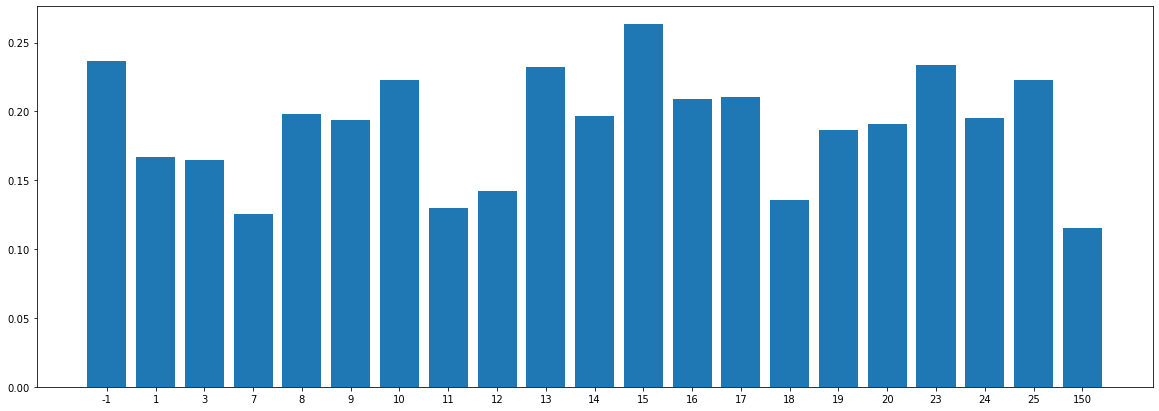

In [86]:
bar_plot(stats, r=0, count=False, file_name='since_release')

In [72]:
a = [0,  7, 14, 21, 28, 35, 42, 49, 56]
b = [1,  8, 15, 22, 29, 36, 43, 50, 57]
c = [2,  9, 16, 23, 30, 37, 44, 51, 58]
d = [3, 10, 17, 24, 31, 38, 45, 52, 59]

e, f, g, h = dict(), dict(), dict(), dict()
for i in range(len(a)):
    e[a[i]] = calendar.day_name[int(showings.loc[showings.days_since_release == a[i], 'dayofweek'].median())]
    f[b[i]] = calendar.day_name[int(showings.loc[showings.days_since_release == b[i], 'dayofweek'].median())]
    g[c[i]] = calendar.day_name[int(showings.loc[showings.days_since_release == c[i], 'dayofweek'].median())]
    h[d[i]] = calendar.day_name[int(showings.loc[showings.days_since_release == d[i], 'dayofweek'].median())]

In [73]:
e, f, g, h

({0: 'Thursday',
  7: 'Thursday',
  14: 'Thursday',
  21: 'Thursday',
  28: 'Thursday',
  35: 'Thursday',
  42: 'Thursday',
  49: 'Thursday',
  56: 'Thursday'},
 {1: 'Friday',
  8: 'Friday',
  15: 'Friday',
  22: 'Friday',
  29: 'Friday',
  36: 'Friday',
  43: 'Friday',
  50: 'Friday',
  57: 'Friday'},
 {2: 'Friday',
  9: 'Friday',
  16: 'Saturday',
  23: 'Saturday',
  30: 'Saturday',
  37: 'Saturday',
  44: 'Saturday',
  51: 'Saturday',
  58: 'Saturday'},
 {3: 'Saturday',
  10: 'Saturday',
  17: 'Saturday',
  24: 'Saturday',
  31: 'Saturday',
  38: 'Saturday',
  45: 'Saturday',
  52: 'Saturday',
  59: 'Saturday'})